In [2]:
import pandas as pd
df = pd.read_csv('/content/Reduced dataset.csv')
pd.set_option("display.max_columns", None)
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,RainTomorrow
0,0.917123,-0.989051,-2.247827,-0.334443,0.807366,1.416575,0.748832,-0.499977,-1.215516,1.222871,-2.105833,-0.221107,0.588575,False
1,1.174135,0.293917,-2.852850,-1.289379,0.655859,1.200021,1.157208,-0.188419,-0.821333,1.007782,-1.630549,-1.334270,-0.464132,False
2,1.782059,-0.801753,-2.072926,-0.001682,-0.497981,1.934214,0.866245,-0.061038,-1.638167,0.373370,-1.746895,-0.438013,-0.169095,False
3,2.513838,2.786418,0.065938,0.406823,1.078596,2.321191,1.976793,-0.571006,1.337436,-1.307408,0.759693,0.043168,-0.228548,False
4,1.337444,-1.402310,-0.386066,-1.891255,-0.146052,2.963744,0.761437,0.364900,-0.703809,0.490273,-0.123157,0.461421,2.004174,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.083291,3.717595,0.178249,1.472680,1.059254,1.243142,-0.465823,-1.173868,-1.591414,-0.183396,-0.240542,-0.156639,-0.381700,False
145456,0.017570,2.530786,-1.493913,-0.974231,0.510773,2.000113,-0.667787,0.344556,1.314210,2.062914,0.013595,1.574669,0.177982,False
145457,0.723980,2.186017,-1.345525,-0.705006,0.762100,1.645124,-0.586874,-0.136527,0.549743,1.498499,-1.335232,1.344399,0.173301,False
145458,1.138248,2.773601,-0.737286,-0.401495,1.368001,1.103656,-0.423628,-0.634946,-0.787863,1.276614,0.190215,0.626883,0.236019,False


In [3]:
X = df.drop(["RainTomorrow"], axis=1)
Y = df["RainTomorrow"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)


In [4]:
len(X.columns)

13

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
from xgboost import XGBClassifier
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = XGBClassifier(**params_xgb)

In [7]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

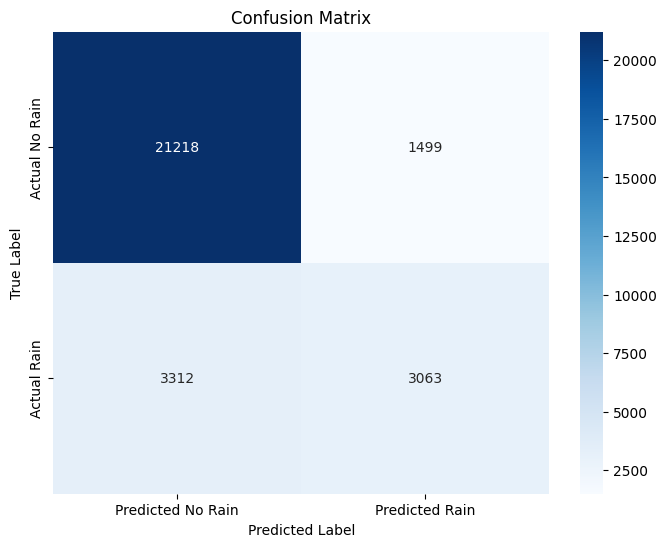

              precision    recall  f1-score   support

       False    0.86498   0.93401   0.89817     22717
        True    0.67142   0.48047   0.56012      6375

    accuracy                        0.83463     29092
   macro avg    0.76820   0.70724   0.72915     29092
weighted avg    0.82257   0.83463   0.82409     29092



In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = model_xgb.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Rain', 'Predicted Rain'],
            yticklabels=['Actual No Rain', 'Actual Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(classification_report(y_test,y_pred,digits=5))

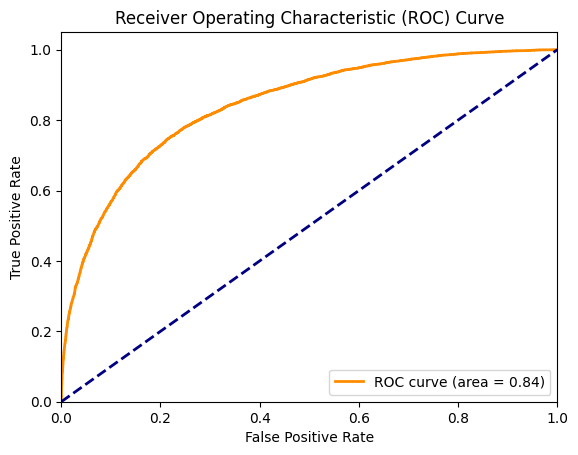

In [9]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model_xgb.predict_proba(X_test)

positive_class_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, positive_class_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()